<a href="https://colab.research.google.com/github/aldikrisnanda/UAS-BDDM/blob/main/UAS_5343.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Klasifikasi Tingkat Obesitas Menggunakan Metode Decision Tree dan Random Forest


Nama : Aldi Krisnanda Putra

Nim  : 22.11.5343

Kelas : 22S1IF13

In [ ]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [ ]:
df = pd.read_csv('/content/Obesity Prediction.csv')

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history,2111,2,yes,1726
FAVC,2111,2,yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,no,2067
SCC,2111,2,no,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public_Transportation,1580
Obesity,2111,7,Obesity_Type_I,351


# EDA

<ipython-input-8-6b76cc402ba5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


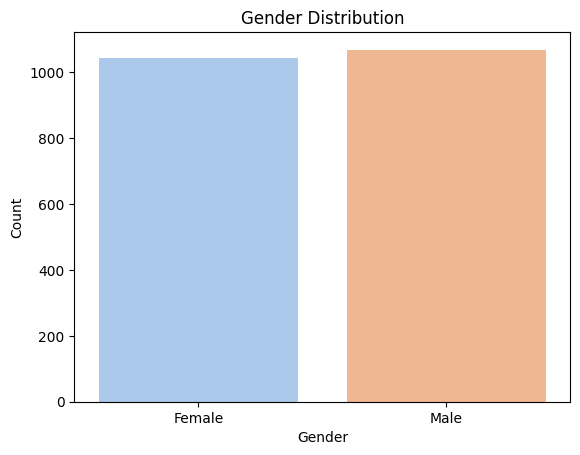

In [ ]:
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

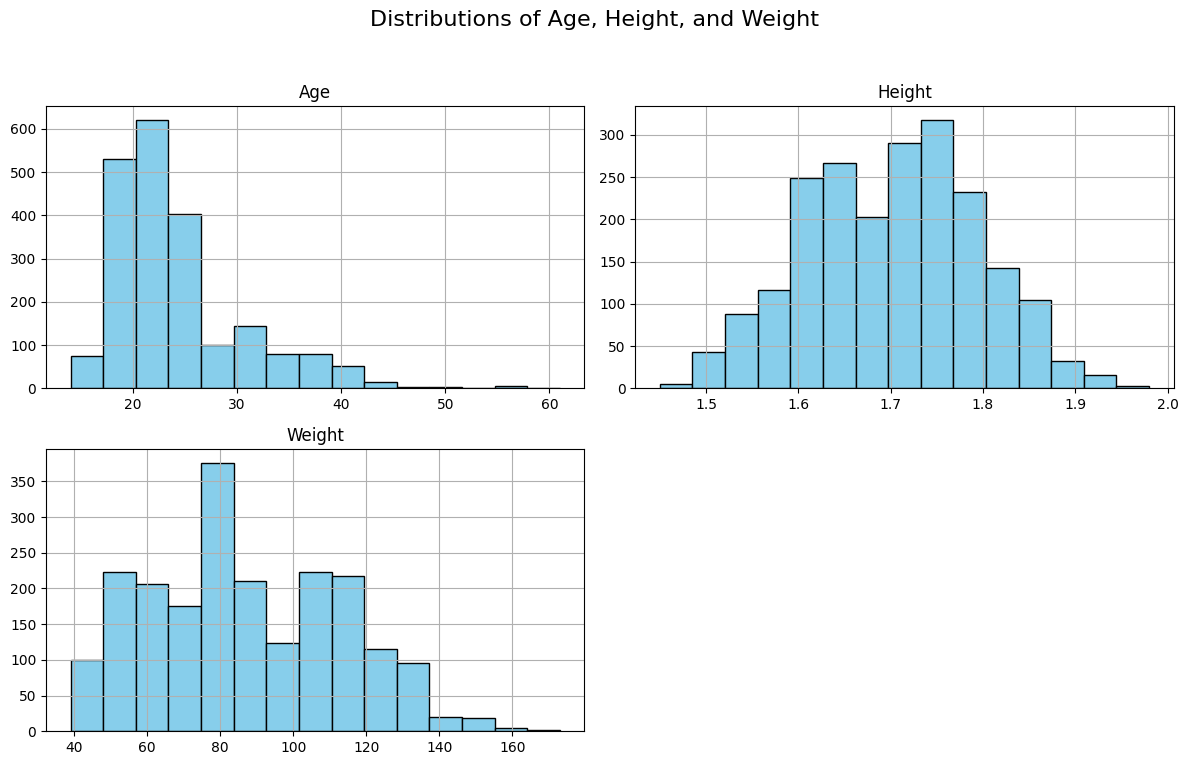

In [ ]:
numeric_vars = ['Age', 'Height', 'Weight']
df[numeric_vars].hist(bins=15, color='skyblue', edgecolor='black', figsize=(12, 8))
plt.suptitle('Distributions of Age, Height, and Weight', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-10-088a43b51f7c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Weight', data=df, palette='Set2')


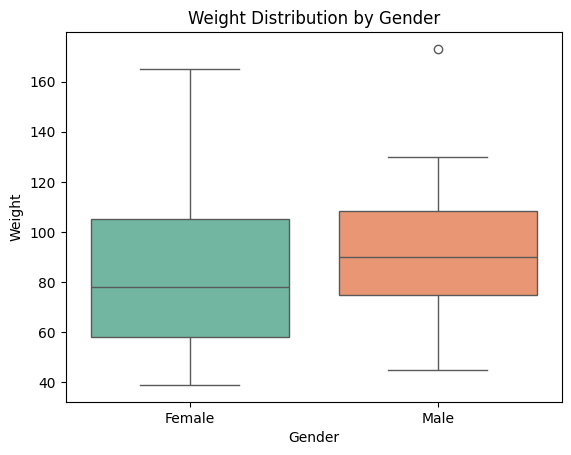

In [ ]:
sns.boxplot(x='Gender', y='Weight', data=df, palette='Set2')
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

<ipython-input-11-8f4f5e82b583>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='family_history', data=df, palette='coolwarm')


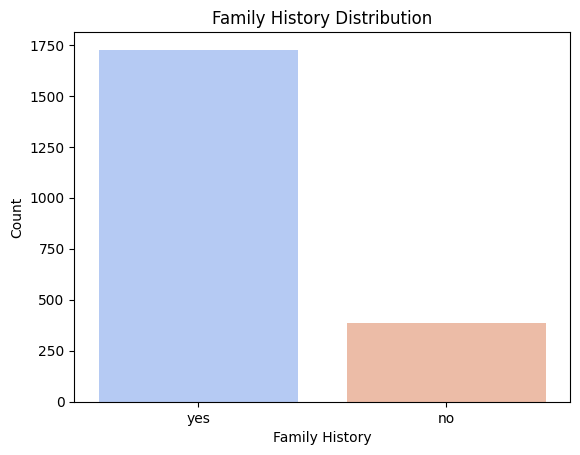

In [ ]:
sns.countplot(x='family_history', data=df, palette='coolwarm')
plt.title('Family History Distribution')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

<ipython-input-12-93b8cda37738>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MTRANS', y='Age', data=df, ci=None, palette='viridis')
<ipython-input-12-93b8cda37738>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MTRANS', y='Age', data=df, ci=None, palette='viridis')


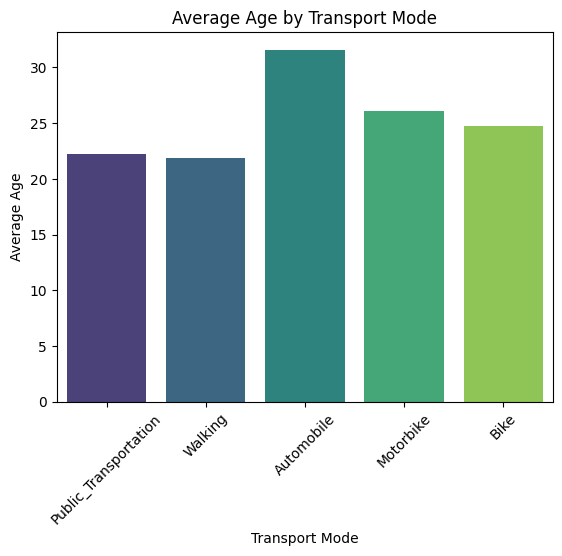

In [ ]:
sns.barplot(x='MTRANS', y='Age', data=df, ci=None, palette='viridis')
plt.title('Average Age by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-37f899039155>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obesity', y='FCVC', data=df, palette='muted')


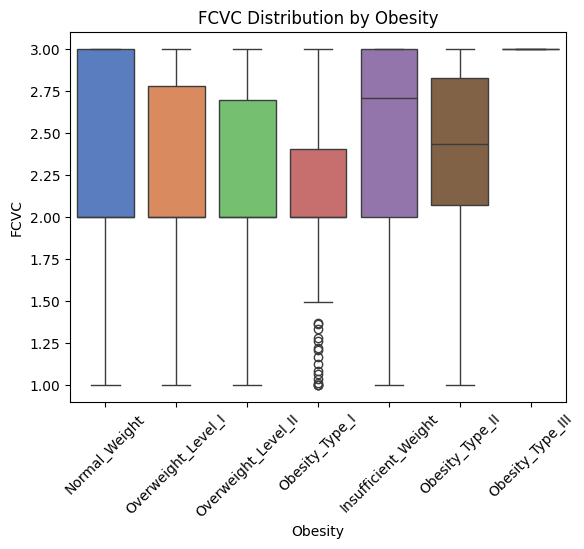

In [ ]:
sns.boxplot(x='Obesity', y='FCVC', data=df, palette='muted')
plt.title('FCVC Distribution by Obesity')
plt.xlabel('Obesity')
plt.ylabel('FCVC')
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-b825e0419f7f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SMOKE', data=df, palette='coolwarm')


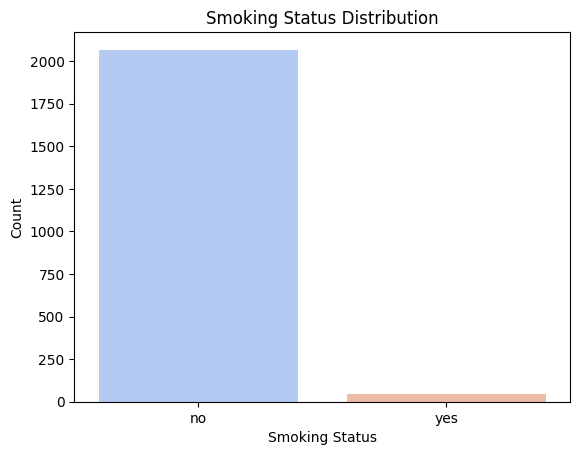

In [ ]:
sns.countplot(x='SMOKE', data=df, palette='coolwarm')
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

<ipython-input-15-201cb5c73ead>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['CH2O'], shade=True, color='blue')


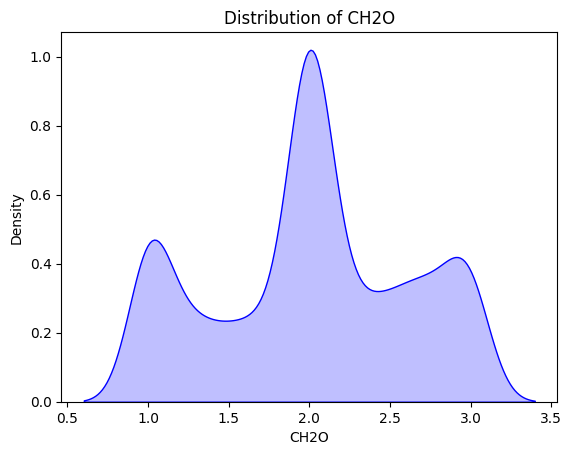

In [ ]:
sns.kdeplot(df['CH2O'], shade=True, color='blue')
plt.title('Distribution of CH2O')
plt.xlabel('CH2O')
plt.ylabel('Density')
plt.show()

# Data Preprocessing

In [ ]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

Missing Value (%)
Gender            0.0
Age               0.0
Height            0.0
Weight            0.0
family_history    0.0
FAVC              0.0
FCVC              0.0
NCP               0.0
CAEC              0.0
SMOKE             0.0
CH2O              0.0
SCC               0.0
FAF               0.0
TUE               0.0
CALC              0.0
MTRANS            0.0
Obesity           0.0
dtype: float64


In [ ]:
print("Duplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Duplicate Rows (%):
0.011369019422074847


In [ ]:
print("After Duplicate Rows (%):")
df = df.drop_duplicates()
duplicate_count = df.duplicated().mean()
print(duplicate_count)

After Duplicate Rows (%):
0.0


In [ ]:
df['Obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
def outlier_check(row, colname):
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier

outliers = pd.DataFrame()

for col in df.select_dtypes(include=['number']).columns:
    outliers_in_col = outlier_check(df, col)
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

Number of Outliers: 746
Outlier Ratio: 35.75%


In [ ]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('Obesity', errors='ignore')

<ipython-input-21-862d722a736f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
<ipython-input-21-862d722a736f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoders[column].fit_transform(df[column])
<ipython-input-21-862d722a736f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   int64  
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   int64  
 5   FAVC            2087 non-null   int64  
 6   FCVC            2087 non-null   float64
 7   NCP             2087 non-null   float64
 8   CAEC            2087 non-null   int64  
 9   SMOKE           2087 non-null   int64  
 10  CH2O            2087 non-null   float64
 11  SCC             2087 non-null   int64  
 12  FAF             2087 non-null   float64
 13  TUE             2087 non-null   float64
 14  CALC            2087 non-null   int64  
 15  MTRANS          2087 non-null   int64  
 16  Obesity         2087 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 

In [ ]:
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

<ipython-input-23-c893d81b8a9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


Correlation

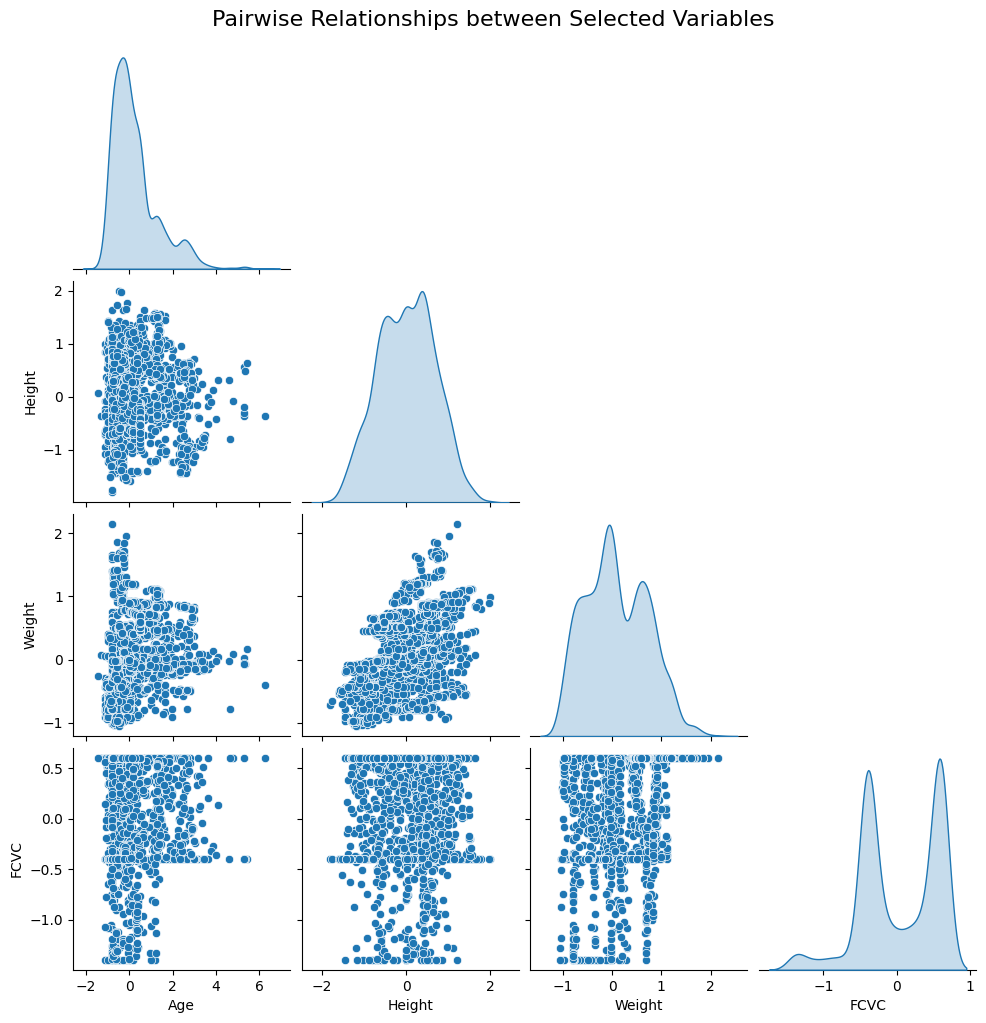

In [ ]:
sns.pairplot(df[['Age', 'Height', 'Weight', 'FCVC']], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships between Selected Variables', y=1.02, fontsize=16)
plt.show()

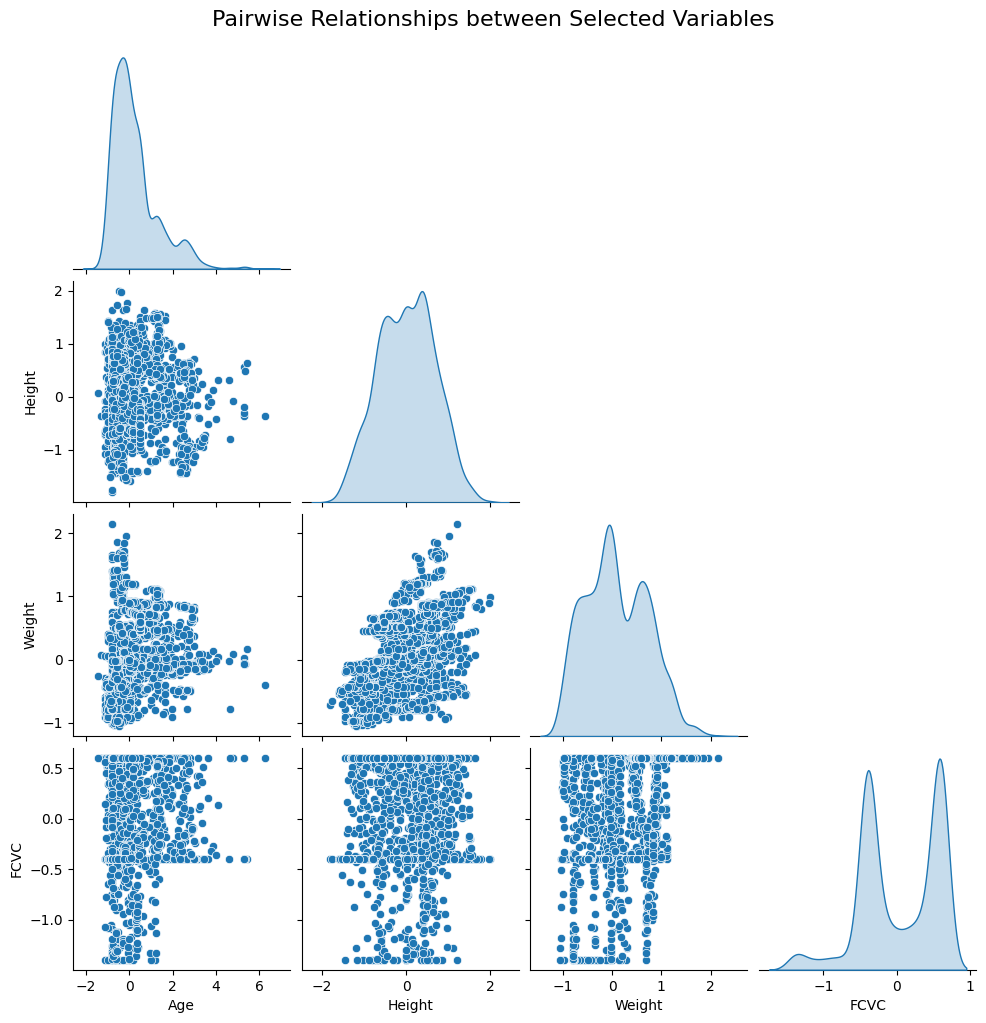

In [ ]:
sns.pairplot(df[['Age', 'Height', 'Weight', 'FCVC']], diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships between Selected Variables', y=1.02, fontsize=16)
plt.show()

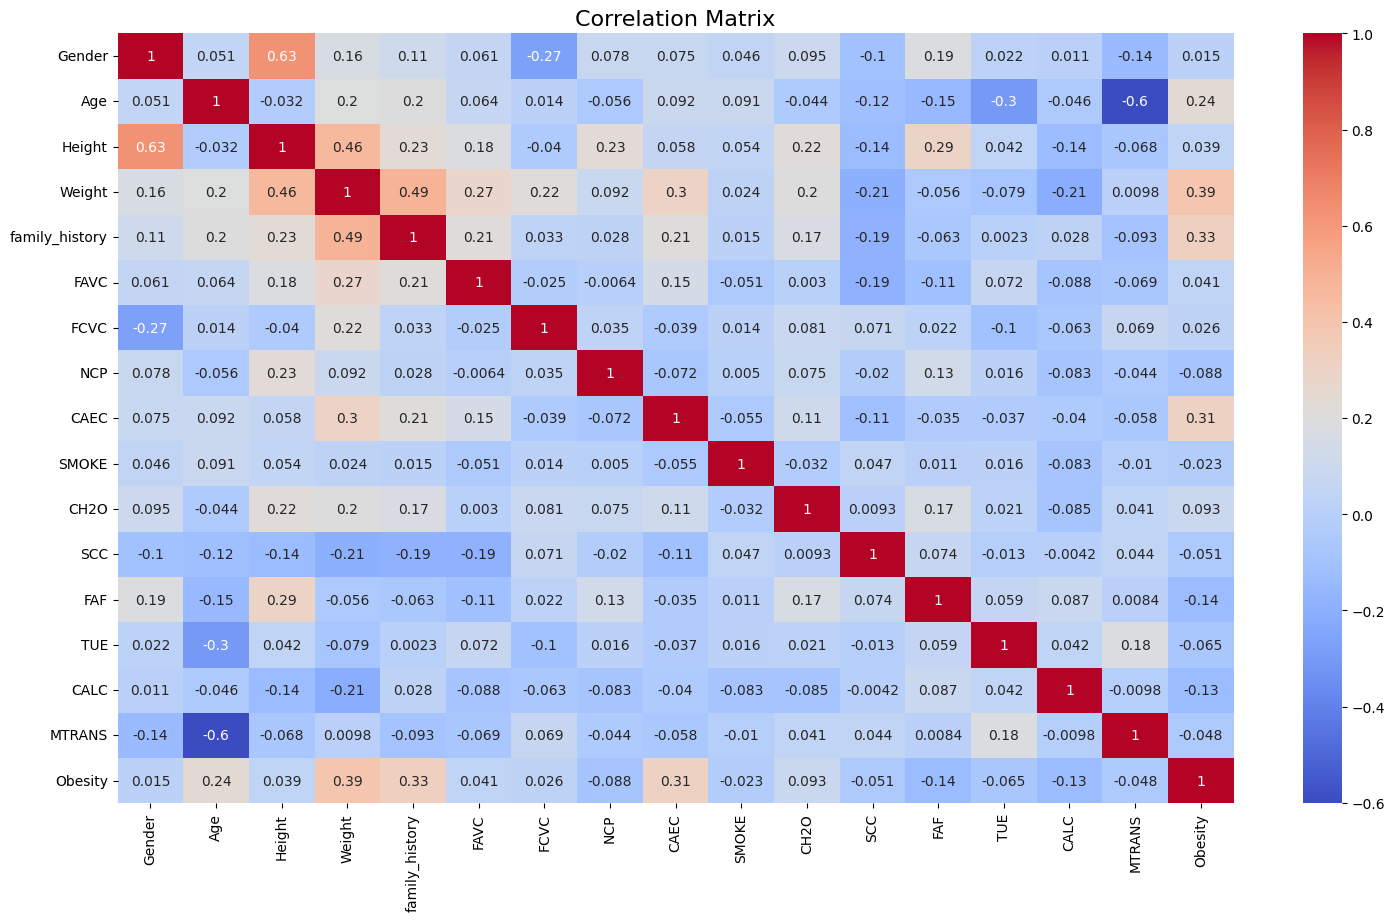

In [ ]:
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# Seleksi Fitur

In [ ]:
x=df.drop(['Obesity'],axis=1)
y=df['Obesity']

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x, y)

feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

           Feature  Importance
3           Weight    0.360192
2           Height    0.102518
1              Age    0.094680
6             FCVC    0.090621
0           Gender    0.050594
7              NCP    0.049249
13             TUE    0.044584
12             FAF    0.040655
10            CH2O    0.040274
14            CALC    0.029167
8             CAEC    0.027684
4   family_history    0.026527
15          MTRANS    0.018183
5             FAVC    0.017534
11             SCC    0.005358
9            SMOKE    0.002180


<ipython-input-29-b1b08662851d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


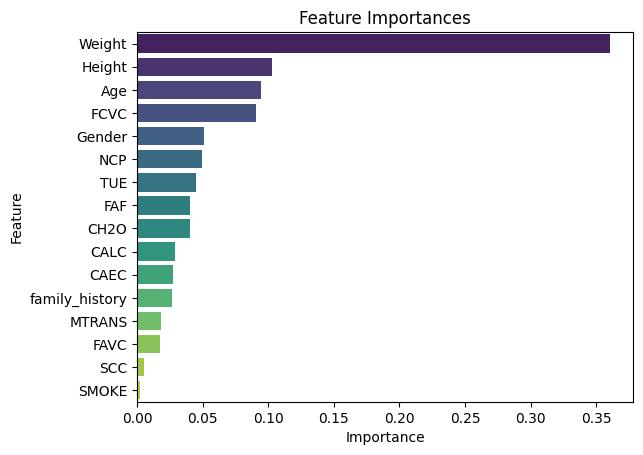

In [ ]:
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.show()

##Modelling


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print("Jumlah data train:", len(x_train))
print("Jumlah data test:", len(x_test))
print("Total data:", len(x_train) + len(x_test))

Jumlah data train: 1460
Jumlah data test: 627
Total data: 2087


In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

y_train_pred_dt = dt_classifier.predict(x_train)
y_test_pred_dt = dt_classifier.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print("Decision Tree Accuracy on test data:", accuracy_dt)

Decision Tree Accuracy on test data: 0.9314194577352473


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

y_train_pred_rf = rf_classifier.predict(x_train)
y_test_pred_rf = rf_classifier.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Random Forest Accuracy on test data:", accuracy_rf)

Random Forest Accuracy on test data: 0.9505582137161085


#Evaluasi Model

Decision Tree:
  Accuracy: 0.9314
  Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.94      0.94        87
           3       0.89      0.81      0.85        95
           5       0.96      0.94      0.95       105
           0       1.00      0.98      0.99        95
           6       1.00      1.00      1.00        91
           4       0.84      0.86      0.85        80
           1       0.88      0.99      0.93        74

    accuracy                           0.93       627
   macro avg       0.93      0.93      0.93       627
weighted avg       0.93      0.93      0.93       627

--------------------


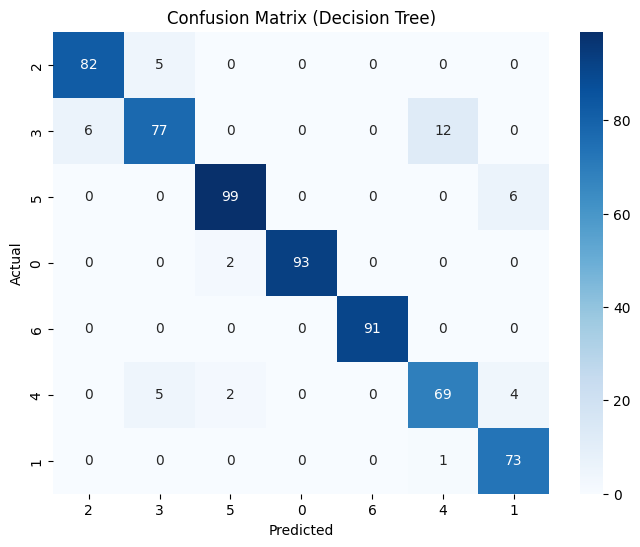

Random Forest:
  Accuracy: 0.9506
  Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.94      0.94        87
           3       0.84      0.88      0.86        95
           5       0.99      0.98      0.99       105
           0       1.00      1.00      1.00        95
           6       1.00      1.00      1.00        91
           4       0.94      0.91      0.92        80
           1       0.96      0.92      0.94        74

    accuracy                           0.95       627
   macro avg       0.95      0.95      0.95       627
weighted avg       0.95      0.95      0.95       627

--------------------


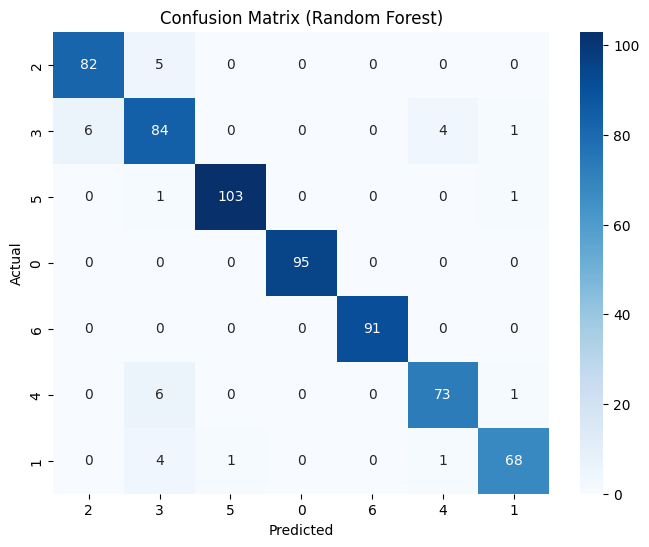

In [ ]:
def evaluate_classifier(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=y_true.unique().astype(str))
    cm = confusion_matrix(y_true, y_pred)

    print(f"{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print("  Classification Report:")
    print(report)
    print("-" * 20)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=y_true.unique().astype(str),
                yticklabels=y_true.unique().astype(str))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

# Evaluate Decision Tree
evaluate_classifier("Decision Tree", y_test, y_test_pred_dt)

# Evaluate Random Forest
evaluate_classifier("Random Forest", y_test, y_test_pred_rf)


Best Model (Machine Learning):
Model        Random Forest
Accuracy          0.950558
Precision         0.951521
Recall            0.950558
F1-Score          0.950879
Name: 1, dtype: object


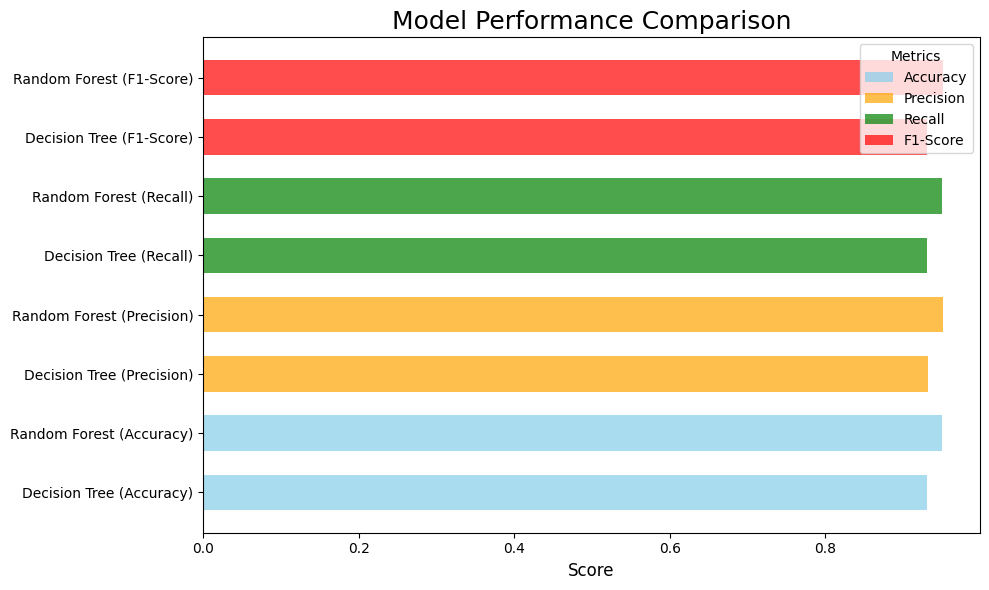


Optimal Model based on Accuracy: Random Forest with Accuracy = 0.9506


In [ ]:
results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_test_pred_dt), accuracy_score(y_test, y_test_pred_rf)],
    'Precision': [precision_score(y_test, y_test_pred_dt, average='weighted'), precision_score(y_test, y_test_pred_rf, average='weighted')],
    'Recall': [recall_score(y_test, y_test_pred_dt, average='weighted'), recall_score(y_test, y_test_pred_rf, average='weighted')],
    'F1-Score': [f1_score(y_test, y_test_pred_dt, average='weighted'), f1_score(y_test, y_test_pred_rf, average='weighted')]
}

# Create the results DataFrame
results_df = pd.DataFrame(results)

best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3
for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)
ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")
plt.tight_layout()
plt.show()
print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

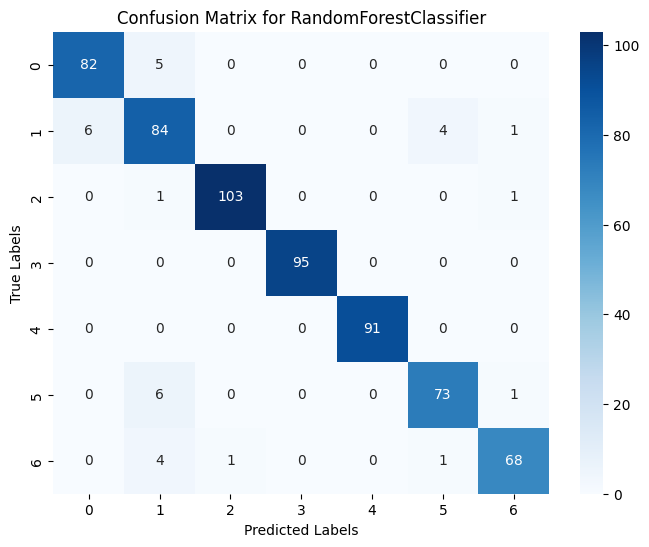


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        87
           1       0.84      0.88      0.86        95
           2       0.99      0.98      0.99       105
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00        91
           5       0.94      0.91      0.92        80
           6       0.96      0.92      0.94        74

    accuracy                           0.95       627
   macro avg       0.95      0.95      0.95       627
weighted avg       0.95      0.95      0.95       627



In [ ]:
model_best = rf_classifier
y_pred = model_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))